# Determination of an REV

In this exercise, we will use a the help of a little "scientific instrument" that you all (or most) have in your pocket to determine a representative elementary volume (REV) scale for a rock (or another item of your choice). We will use a combination of numpy and matplotlib, and learn a little bit about images and conversions.

Recall from the lecture that we can define a characteristic function, for example of porespace, and then use this function to calculate average values in volumes (or areas) to compare values in different volume/ area extents. Plotting the values for multiple extents, we can then (hopefully) determine a reasonable REV range.

First, we use the common imports and set up our notebook:

In [1]:
# Execute this cell to get the notebook style adjusted:
#from IPython.core.display import HTML
#css_file = 'nre2_style.css'
#HTML(open(css_file, "r").read())

In [2]:
%matplotlib inline

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

In [4]:
# We also define a new figure size to increase the standard plots:
plt.rcParams['figure.figsize'] = (12,10)

In [5]:
import colormaps as cmaps
plt.register_cmap(name='viridis', cmap=cmaps.viridis)
plt.register_cmap(name='magma', cmap=cmaps.magma)
plt.set_cmap(cmaps.viridis)

## Importing an image into Python

The first step is to import the image for further processing into Python. Actually, there are multiple ways to import and modify images in Python, from simple basic ones (as the one we are using below) to full featured image processing modules (see the "Python Image Library", PIL (http://effbot.org/imagingbook/pil-index.htm), if you are interested.

For now, we will simply use `matplotlib` function that is able to load a jpeg image file. This image is then stored in a `numpy` array:

In [6]:
import matplotlib.image as mpimg

In [7]:
cp = mpimg.imread("isla-wall.jpg")

In [8]:
type(cp)

numpy.ndarray

Have a look at the shape of this array: it should have the dimensions of your camera pixels in x- and y-directions, plus a third dimension:

In [9]:
cp.shape

(1165L, 1725L, 3L)

The third dimension contains the color information in the form of "RGB" values. You can simply visualise the figure with the matplotlib `imshow` function:

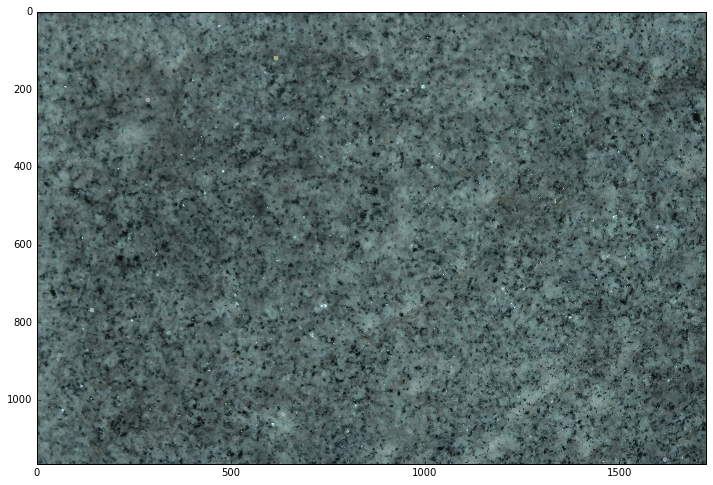

In [10]:
plt.imshow(cp)

## Convert RGB Image to grayscale

Of course, we do not need an RGB image for our purpose: we require an image (or 2D array) with values of the characteristic function (either 0 or 1). In the case of an image, this relates to converting the image to a black and white image. This step is usually done on the basis of a grayscale image.

So, as a next step, we will create a grayscale image from the RGB image. For this conversion, we can use a simple calculation, described here:

https://en.wikipedia.org/wiki/Grayscale#Converting_color_to_grayscale

The RGB channels in our image are in columns `[:,:,0]`, `[:,:,1]`, and `[:,:,2]`, and the conversion equation is:

$$v_{gray} = 0.2989 \cdot v_R + 0.5870 \cdot v_G + 0.1140 \cdot v_B$$

where $v_R, v_G, v_B$ are the RGB values of the image, and $v_G$ the converted grayscale value.

In [11]:
# your code: create a grayscale image:
r,g,b = cp[:,:,0], cp[:,:,1], cp[:,:,2]
vgray = 0.2989*r + 0.5870*g + 0.1140*b


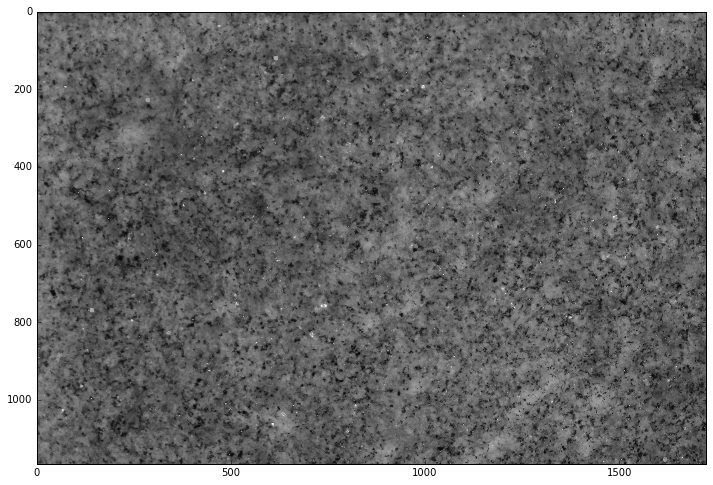

In [12]:
# your code: create image of grayscale image
plt.imshow(vgray, cmap = 'gray')

We now want to convert this grayscale image into a black and white picture. This step is simply a threshold operation where we assign all values above a certain range to 1 (i.e. those image values that correspond, for example, to porespace), and values below to 0.

In order to identify a reasonable threshold range, we can first have a look at a histogram of all values in the grayscale image. In order to do that, we need to "flatten" the 2D numpy array containing the image data to a 1D array (`grayscale_image.flatten()`). This array can then be used in a histogram plot:

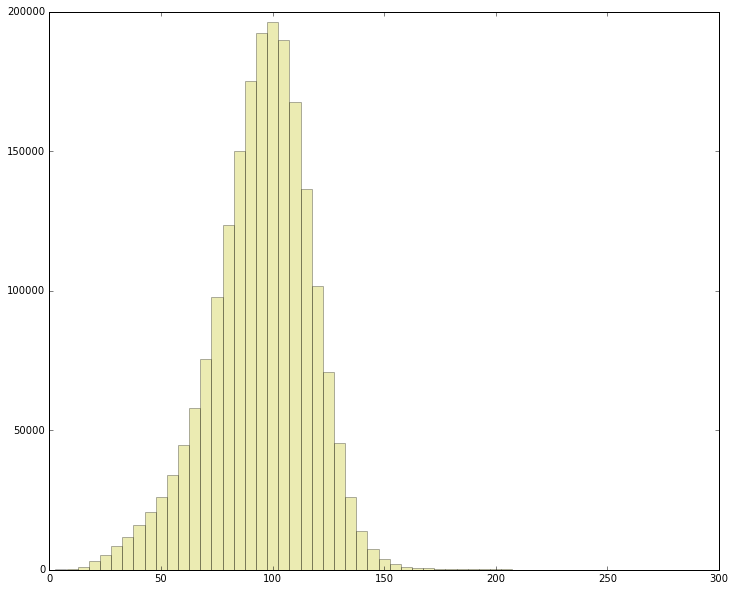

In [13]:
# your code here: flatten image and create histogram plot

plt.hist(vgray.flatten(), bins = 50, color = 'y', alpha=0.3);

What would be a reasonable threshold value?

## Define a threshold and convert to B/W

As a next step, we now apply a threshold and create the black and white image. You can follow these  steps to achieve this:

1. First, create an empty array of the same size as the grayscale image (e.g. with the `np.zeros_like()`-function)
1. Choose the threshold value
1. Now, determine all values in the grayscale image that have a value larger than this threshold value and set the entries in your new array according to these positions to `1` (so that all other values remain `0`)

Finally, create an image of the black and white converted picture to check your result (Hint: also: try several threshold values).

In [14]:
# Your code here:
threshold = 95
dummy = np.zeros_like(vgray)

dummy[vgray<=threshold] =  1
    

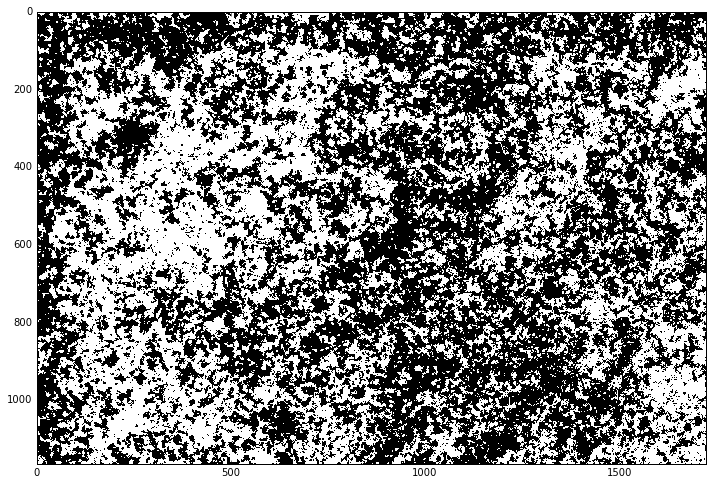

In [15]:
plt.imshow(dummy, cmap = 'gray', interpolation = 'nearest')

## Determination of the REV

Now that we have the characteristic function determined at all locations (i.e. the B/W image), we can determine average values of this functions for a defined subregion of the image.

Again, the steps to follow:

1. Define a subregion of the model (for example, with a central point `x0, x1` and an extent;
2. Extract the subregion (create a plot to check, if you like);
3. Calculate the average value of the characteristic function in this subregion.

0.4753


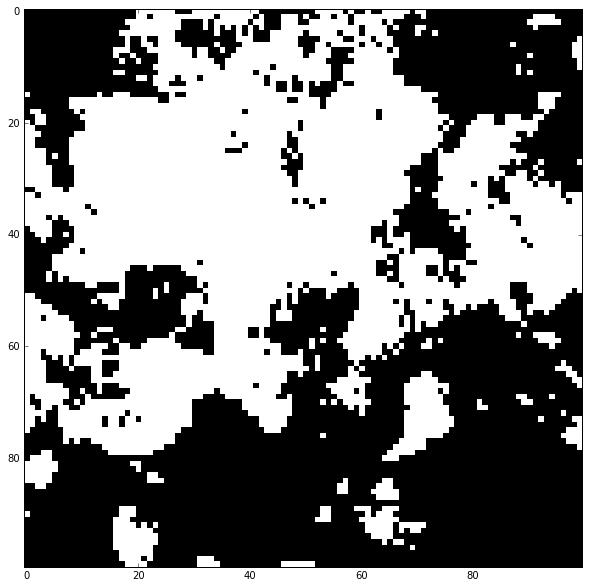

In [16]:
# Your code here:

#define central point

x_0 = 1000
y_0 = 600
sub_extent = 100

# Here an example of the single steps:
subregion = dummy[x_0-sub_extent/2:x_0+sub_extent/2, y_0-sub_extent/2:y_0+sub_extent/2]

char_mean = subregion.mean()
print(char_mean)

plt.imshow(subregion, cmap = 'gray', interpolation = 'nearest')

For better code re-use in the following, define a function to perform the calculation (without the plot) and to return the average value for a defined subregion:


In [17]:
# Your task: fill in the code of this function:
def gamma_val(dummy, x_0, y_0, sub_extent):
    """Determine gamma value from image for given point and extent
    **Arguments**:
        - *img* = 2D ndarray
        - *x_0, y_0* = int, int : central point for REV
        - *extent* = int : extent of REV
    
    **Returns**:
        char_val = float : value of characteristic function
    """
    subregion = dummy[x_0-sub_extent/2:x_0+sub_extent/2, y_0-sub_extent/2:y_0+sub_extent/2]
    char_mean = subregion.mean()
    
    return char_mean
    

We can now use this function to determine average values for multiple subregions, around the same central point. A plot of all of these values for increasing regions will then (hopefully) give us an idea about an REV.

**Your task**: define a central point, a maximum extent of the subregions, and calculate average values of the characteristic functions for all of these regions. Finally, create a plot of the results:

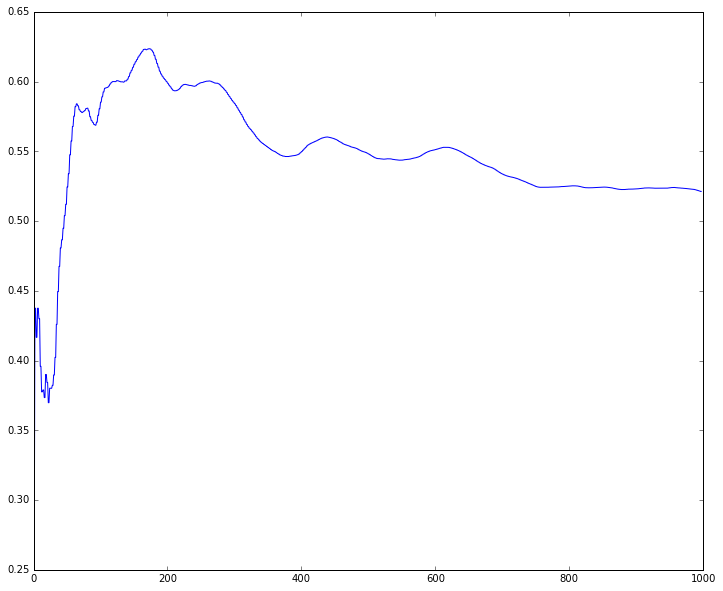

In [18]:
# your code here:
x_0 = 600
y_0 = 600
max_extent = 1000
char_vals = []

for extent in range(2,max_extent):
    char_vals.append(gamma_val(dummy, x_0, y_0, extent))
    
plt.plot(char_vals)

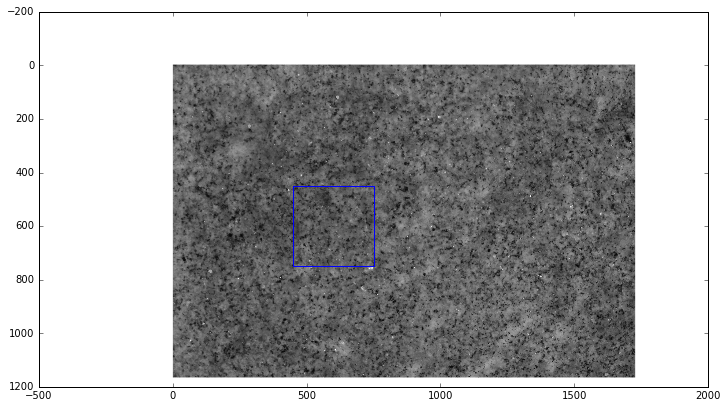

In [19]:
plt.imshow(vgray, cmap = 'gray')
e = 300
xvals = [x_0-e/2,x_0+e/2,x_0+e/2,x_0-e/2,x_0-e/2]
yvals = [y_0-e/2,y_0-e/2,y_0+e/2,y_0+e/2,y_0-e/2]
plt.plot(xvals,yvals)

In [20]:
# now: determine entire extent range


What do you think: did you obtain a reasonable range for an REV? How could you get a better basis for the interpretation?

One idea would be, to determine the REV for multiple starting points in the image, and then to compare all obtained curves. Do the estimates converge to a similar value in the REV range for all starting points? Try it out:

In [21]:
# your code here: define central points
x_0 = 600
y_0 = 600
max_extent = 900

all_results = []
for x_0 in [900,1000,1100,1200]:
    for y_0 in [900,1000,1100,1200]:
        char_vals=[]
        for extent in range(2,max_extent):
            char_vals.append(gamma_val(dummy, x_0, y_0, extent))
        all_results.append(char_vals)
    

C:\Users\Kittiphon\Anaconda2\lib\site-packages\numpy\core\_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
C:\Users\Kittiphon\Anaconda2\lib\site-packages\numpy\core\_methods.py:70: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


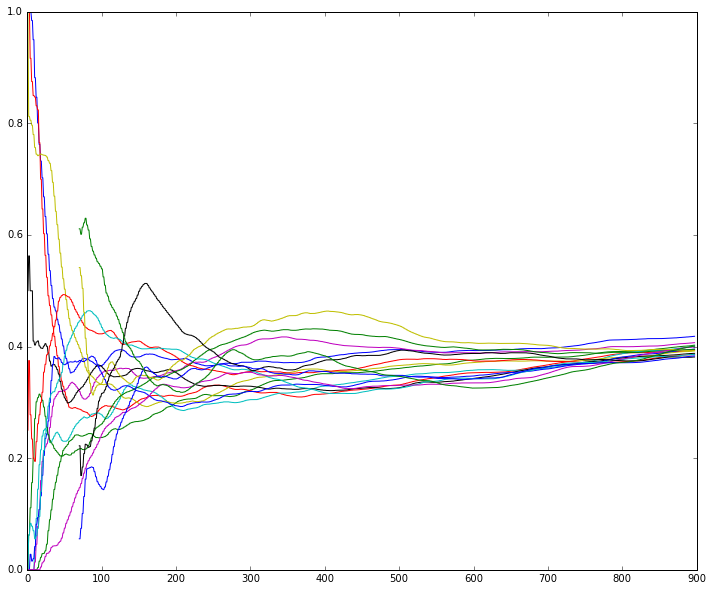

In [22]:
# now: determine curves for all central points:
for char_vals in all_results:
    plt.plot(char_vals)

In [23]:
# Various sections of the sample were tested and plotted, and all results of all areas converge at around 0.4 (est. REV)

print char_mean

0.4753


What do you now think of a reasonable estimate for the range of the REV?

Here some additional ideas:

1. Determine the real length scale of the REV and compare it to the "original" sample
2. Create a plot of the (original or grayscale) image, and add a frame to show the extent of the REV.

Are the results as you would have expected, before?

0.4753


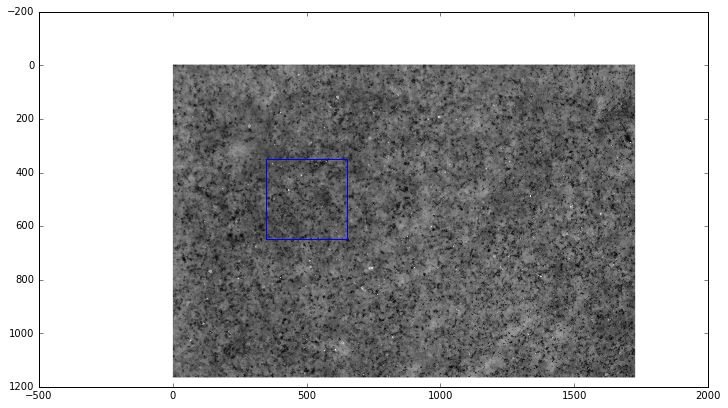

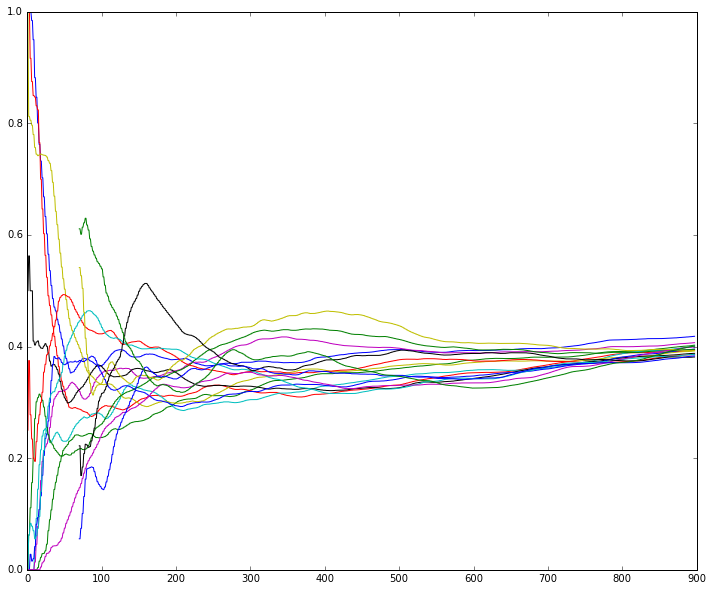

In [24]:
# Your code: plot image, and above it, a frame showing the estimated REV

x_0 = 500
y_0 = 500
max_extent = 900

plt.subplots()
plt.imshow(vgray, cmap = 'gray')
e = 300
xvals = [x_0-e/2,x_0+e/2,x_0+e/2,x_0-e/2,x_0-e/2]
yvals = [y_0-e/2,y_0-e/2,y_0+e/2,y_0+e/2,y_0-e/2]
plt.plot(xvals,yvals)
print char_mean


plt.subplots()
all_results = []
for x_0 in [900,1000,1100,1200]:
    for y_0 in [900,1000,1100,1200]:
        char_vals=[]
        for extent in range(2,max_extent):
            char_vals.append(gamma_val(dummy, x_0, y_0, extent))
        all_results.append(char_vals)

for char_vals in all_results:
    plt.plot(char_vals)

## Comparison to a random field

As a last step, let us compare the results to an REV of an uncorrelated random field. Instead of using an image, we now simply create a 2D random field, for example with the function `np.random.random((N,M))`, where `N` and `M` are the "image" dimensions of the random image:

In [25]:
# Your code here:



Create a visual representation of this generated field and compare it to your analysed image above: which range for the REV do you expect?

In [26]:
# your code here: create image


So, now: repeat the calculation of before and determine the range of the REV (ideally, again for multiple central points):

In [27]:
# your code here:




Interesting, isn't it? Well, it is not too surprising that we converge to a final value. In geotstatistical terms, this is the "stationary" mean - and it shows that this random field can be considered as completely stationary. However, it is also highly unrealistic, considering the fact that geological materials are not completely random and uncorrelated...

So, here as a last question to think about: how could you create a more realisitc material for a geological model, something that replicates the behaviour you obtained above?